# 소셜 네트워크 분석

## 1. 비즈니스 이해

### Background: 어떠한 문제가 존재하는지 상황에 대해 알려진 기사, 논문, 보고서 등을 인용하여 현상을 구체적으로 기술하시기 바랍니다.
- [[열려라 공부] 새 친구 '탐색 시기' 학교폭력도 늘어요](http://news.joins.com/article/21292322)
- 새 학년이 시작되는 3월엔 새로 만난 학생 사이의 갈등도 생기기 마련이다. 송형호 서울 천호중 교사(전 서울시교육청학교폭력담당 파견교사)는 이를 두고 ‘3주의 징크스’라고 불렀다. 개학 직후 1~2주를 지나 3주차가 되면 크고 작은 학교폭력이 시작된다는 설명이다.

### Business Objectives: 기업(혹은 본인)에게 이 현상이 어떠한 이유로 분석을 해야 하는지 추상적(함축적)으로 기술하시기 바랍니다.
- 교우관계 진단을 통해 “따돌림 위기군”을 사전에 파악하고, 학교 내 청소년 교우관계 문제를 해소하는데 도움이 되고자 함.

### Business Success Criteria: 비즈니스 관점에서 분석결과의 성공기준(정량적) 또는 유용한 결과에 대한 기준(정성적)을 설명하십시오.
- 교사 입장에서 교우관계 진단을 통해, 집중적으로 관리해야할 학생군을 파악하고, 학기 초와 비교하여 학기 말에 1명(왕따) 혹은 2명의 학생 네트워크 수를 줄인다.

### Analysis Goals: 비즈니스 목표에 대한 의사결정 지원을 위해 실시하는 분석의 목표를 기술합니다. 
- 학생 네트워크 수의 변화 양상 분석, 소수 학생(1명 혹은 2명간) 네트워크 파악
- ![외톨이 유형](외톨이.jpg)
- 참조문헌(http://cyram.tistory.com/213)

## 2. 데이터의 이해
- 학기초 학생에 대한 설문조사를 실시하여 데이터를 수집함.
- [구글 설문조사 활용](https://goo.gl/forms/QSPhpQmOpWwxT1gS2)
    - 구글 설문: 학기 초 1회 실시(47명)
    - 구글 설문: 학기 중간 1회 실시(47명)
- 데이터 전처리 : 2개 entity를 결합 / 집계


## 3. 데이터 준비

In [1]:
# 네트워크 분석을 지원하는 networkx, pydot 모듈을 설치해야 함.
# conda install -c anaconda networkx
# pip install pydot
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import pydot
%matplotlib inline

# 폰트 문제 해결하기
import platform

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

#### 네트워크 그래프 클래스
- Graph: 이 클래스는 무방향 그래프를 구현합니다. 두 노드 사이의 여러 엣지를 무시합니다. 노드와 노드 사이에 자체 루프 에지를 허용합니다.
- DiGraph: 방향성 그래프, 즉 방향성 엣지를 가진 그래프. 유향 그래프(Graph의 서브 클래스)에 공통의 조작을 제공합니다.
- MultiGraph: 노드 쌍 사이에 여러 무방향 에지를 허용하는 유연한 그래프 클래스입니다. 추가 유연성은 일반적으로 중요하지 않지만 성능 저하를 가져옵니다.
- MultiDiGraph: MultiGraph의 방향성 버전.

In [2]:
# 그래프 유형 선언
G1 = nx.Graph()
G2 = nx.DiGraph()
G3 = nx.MultiGraph()
G4 = nx.MultiDiGraph()

In [3]:
G = nx.Graph()
G.add_edge('A', 'B')
G.add_edge('B', 'D')
G.add_edge('A', 'C')
G.add_edge('C', 'D')
nx.shortest_path(G, 'A', 'D', weight='weight')

['A', 'B', 'D']

### 데이터 임포트
- 데이터 내 값: NaN은 하나의 열 단위로 존재하는데, 이는 해당 열의 인원이 출석하지 않음을 의미함. -> 제거
- 데이터 내 값: - 은 본인이 본인을 평가할 수 없기 때문에 입력된 것
- 데이터 내 값: 1 은 관계가 있음을 의미
- 데이터 내 값: 0 은 관계가 없음을 의미

In [5]:
# 구글 설문 데이터를 불러옴.
data = pd.read_excel("212students.xlsx")
data.head()

NameError: name 'pd' is not defined

In [6]:
data.set_index("당신의 이름은 무엇입니까?", inplace = True)

NameError: name 'data' is not defined

In [7]:
# 설문에 참여를 참여를 안 한 열을 제거함.
data = data.dropna(axis=1) # axis =1 열을 기준으로 삭제
data.head()

NameError: name 'data' is not defined

In [8]:
# 우리는 adjacency matrix나 edgelist가 필요함.
# 컬럼명을 변경해야함. ex) 1. 경영학부 10학번 이정우 -> 이정우
data.columns # 우선 컬럼명 조회

NameError: name 'data' is not defined

In [9]:
data.columns[0].split()

NameError: name 'data' is not defined

In [49]:
# 컬럼명 정리
column_list = []
for i in data.columns:
    column_list.append(i.split()[-1]) # 공백으로 나눠서 나오는 리스트의 맨 마지막 문자열[-1]이 바로 학생이름임.
column_list[:5]

['1.고유진', '2.김가은', '3.김다희', '4.김민서', '5.김시은']

In [50]:
data.columns = column_list
data.head()

,1.고유진,2.김가은,3.김다희,4.김민서,5.김시은,6.김유정,7.김은지,8.김채윤,9.김해빈,10.김효진,...,20.이주윤,21.이지원,22.이하얀,23.이한빛,24.이혜교,25.임연희,26.정유진,27.지서향,28.최서희,29.천일화
당신의 이름은 무엇입니까?,,,,,,,,,,,,,,,,,,,,,
이다은,0,1,1,0,0,0,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
류혜인,0,1,1,0,0,0,1,0,1,1,...,0,0,0,0,0,0,0,1,0,0
고유진,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,1,1,1,1,1,1
신해린,1,0,1,1,1,0,0,0,0,0,...,0,0,1,1,1,1,0,1,1,1
김해빈,0,1,1,0,1,1,1,0,0,1,...,1,1,0,1,1,0,0,1,0,0


In [27]:
# 엣지리스트 만들기
edgelist = []
for i in data.index:
    for j in data.columns:
        if data.loc[i,j] == 1:
            edgelist.append((i,j))
        else:
            pass
edgelist

[('이다은', '2.김가은'),
 ('이다은', '3.김다희'),
 ('이다은', '7.김은지'),
 ('이다은', '9.김해빈'),
 ('이다은', '10.김효진'),
 ('이다은', '12.류혜인'),
 ('이다은', '16.신정화'),
 ('이다은', '21.이지원'),
 ('이다은', '24.이혜교'),
 ('이다은', '27.지서향'),
 ('류혜인', '2.김가은'),
 ('류혜인', '3.김다희'),
 ('류혜인', '7.김은지'),
 ('류혜인', '9.김해빈'),
 ('류혜인', '10.김효진'),
 ('류혜인', '18.이다은'),
 ('류혜인', '27.지서향'),
 ('고유진', '2.김가은'),
 ('고유진', '8.김채윤'),
 ('고유진', '11.나혜린'),
 ('고유진', '17.신해린'),
 ('고유진', '19.이세정'),
 ('고유진', '22.이하얀'),
 ('고유진', '24.이혜교'),
 ('고유진', '25.임연희'),
 ('고유진', '26.정유진'),
 ('고유진', '27.지서향'),
 ('고유진', '28.최서희'),
 ('고유진', '29.천일화'),
 ('신해린', '1.고유진'),
 ('신해린', '3.김다희'),
 ('신해린', '4.김민서'),
 ('신해린', '5.김시은'),
 ('신해린', '11.나혜린'),
 ('신해린', '16.신정화'),
 ('신해린', '19.이세정'),
 ('신해린', '22.이하얀'),
 ('신해린', '23.이한빛'),
 ('신해린', '24.이혜교'),
 ('신해린', '25.임연희'),
 ('신해린', '27.지서향'),
 ('신해린', '28.최서희'),
 ('신해린', '29.천일화'),
 ('김해빈', '2.김가은'),
 ('김해빈', '3.김다희'),
 ('김해빈', '5.김시은'),
 ('김해빈', '6.김유정'),
 ('김해빈', '7.김은지'),
 ('김해빈', '10.김효진'),
 ('김해빈', '12.류혜인'),
 ('김해빈', '13.박보경'),

In [28]:
len(edgelist) # 관계의 수를 확인

387

In [29]:
# 방향성 그래프를 만들고, 우리가 만든 관계 리스트(edgelist)를 입력시킨다.
G = nx.DiGraph()
G.add_edges_from(edgelist)

In [30]:
# node 확인
G.node

NodeView(('이다은', '2.김가은', '3.김다희', '7.김은지', '9.김해빈', '10.김효진', '12.류혜인', '16.신정화', '21.이지원', '24.이혜교', '27.지서향', '류혜인', '18.이다은', '고유진', '8.김채윤', '11.나혜린', '17.신해린', '19.이세정', '22.이하얀', '25.임연희', '26.정유진', '28.최서희', '29.천일화', '신해린', '1.고유진', '4.김민서', '5.김시은', '23.이한빛', '김해빈', '6.김유정', '13.박보경', '14.박연주', '15.신세은', '20.이주윤', '신정화', '나혜린', '최서희', '김채윤', '박연주', '김효진', '이혜교', '김가은', '김은지', '임연희', '천일화', '정유진', '이지원', '박보경', '김유정', '이주윤', '신세은', '이세정', '이하얀', '김민서', '김시은', '김다희', '이한빛', '지서향'))

In [31]:
# edge 확인
G.edges

OutEdgeView([('이다은', '2.김가은'), ('이다은', '3.김다희'), ('이다은', '7.김은지'), ('이다은', '9.김해빈'), ('이다은', '10.김효진'), ('이다은', '12.류혜인'), ('이다은', '16.신정화'), ('이다은', '21.이지원'), ('이다은', '24.이혜교'), ('이다은', '27.지서향'), ('류혜인', '2.김가은'), ('류혜인', '3.김다희'), ('류혜인', '7.김은지'), ('류혜인', '9.김해빈'), ('류혜인', '10.김효진'), ('류혜인', '18.이다은'), ('류혜인', '27.지서향'), ('고유진', '2.김가은'), ('고유진', '8.김채윤'), ('고유진', '11.나혜린'), ('고유진', '17.신해린'), ('고유진', '19.이세정'), ('고유진', '22.이하얀'), ('고유진', '24.이혜교'), ('고유진', '25.임연희'), ('고유진', '26.정유진'), ('고유진', '27.지서향'), ('고유진', '28.최서희'), ('고유진', '29.천일화'), ('신해린', '1.고유진'), ('신해린', '3.김다희'), ('신해린', '4.김민서'), ('신해린', '5.김시은'), ('신해린', '11.나혜린'), ('신해린', '16.신정화'), ('신해린', '19.이세정'), ('신해린', '22.이하얀'), ('신해린', '23.이한빛'), ('신해린', '24.이혜교'), ('신해린', '25.임연희'), ('신해린', '27.지서향'), ('신해린', '28.최서희'), ('신해린', '29.천일화'), ('김해빈', '2.김가은'), ('김해빈', '3.김다희'), ('김해빈', '5.김시은'), ('김해빈', '6.김유정'), ('김해빈', '7.김은지'), ('김해빈', '10.김효진'), ('김해빈', '12.류혜인'), ('김해빈', '13.박보경'), ('김해빈', '14.박연주'), ('김해빈', '15.신세은'),

### 그래프 그려보기
![색깔조합](named_colors.png)
- [색상참조](https://matplotlib.org/2.0.2/examples/color/named_colors.html)
- [파라미터 참조](https://networkx.github.io/documentation/latest/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html#networkx.drawing.nx_pylab.draw_networkx)

- nx.draw(G) : 기본 그리기
- nx.draw_circular(G) : 원 위에 노드 놓기
- nx.draw_graphviz(G) : Graphviz 사용
- nx.draw_kamada_kawai(G) : kamada_kawai 알고리즘
- nx.draw_random(G) : 균등 분포를 이용한 랜덤
- nx.draw_shell(G) : 동심원 위에 노드 놓기
- nx.draw_spectral(G) : 그래프 라플라시안의 고유 벡터 기반
- nx.draw_spring(G) : Fruchterman-Reingold force-directed alg. 기반

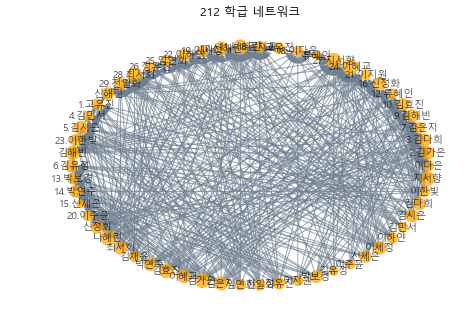

In [58]:
nx.draw_shell(G, node_size = [j * 10 for i, j in nx.degree(G)], # 노드 사이즈
                     node_color = "orange", # 노드 색상
                     edge_color = "slategray", # 엣지 색상
                     alpha = 0.7, # 노드와 엣지의 투명도
                     with_labels = True,# 노드 이름 표시 여부
                     font_size=10, # 폰트 사이즈
                     font_family='Malgun Gothic', # 한글설정
                     arrowsize = 15) # 화살표 크기
plt.rc('font', family='Malgun Gothic') # 폰트 문제
plt.title('212 학급 네트워크') # 그래프 제목
plt.savefig('first_network.png') # 파일 저장

In [3]:
nx.draw_kamada_kawai(G, node_size = [j * 10 for i, j in nx.degree(G)], # 노드 사이즈
                     # node_color = "cadetblue", # 노드 색상
                     node_color = range(len(G.nodes)),
                     edge_color = "skyblue", # 엣지 색상
                     # edge_color=colors,
                     alpha = 0.7, # 노드와 엣지의 투명도
                     with_labels = True, # 노드 이름 표시 여부
                     font_size=10, # 폰트 사이즈
                     font_family='Malgun Gothic', # 한글설정
                     arrowsize = 10) # 화살표 크기
plt.rc('font', family='Malgun Gothic') # 폰트 문제
plt.title('212 학급 네트워크') # 그래프 제목
plt.savefig('second_network.png') # 파일 저장

NameError: name 'nx' is not defined

## 4. 데이터 분석

### 연결 정도(양적인 영향력)

In [35]:
nx.degree(G)

DiDegreeView({'이다은': 10, '2.김가은': 16, '3.김다희': 15, '7.김은지': 11, '9.김해빈': 15, '10.김효진': 14, '12.류혜인': 9, '16.신정화': 16, '21.이지원': 9, '24.이혜교': 22, '27.지서향': 21, '류혜인': 7, '18.이다은': 9, '고유진': 12, '8.김채윤': 11, '11.나혜린': 19, '17.신해린': 16, '19.이세정': 11, '22.이하얀': 13, '25.임연희': 11, '26.정유진': 9, '28.최서희': 20, '29.천일화': 13, '신해린': 14, '1.고유진': 12, '4.김민서': 9, '5.김시은': 17, '23.이한빛': 13, '김해빈': 17, '6.김유정': 15, '13.박보경': 11, '14.박연주': 14, '15.신세은': 6, '20.이주윤': 10, '신정화': 14, '나혜린': 20, '최서희': 16, '김채윤': 11, '박연주': 14, '김효진': 18, '이혜교': 16, '김가은': 19, '김은지': 17, '임연희': 11, '천일화': 12, '정유진': 13, '이지원': 10, '박보경': 14, '김유정': 7, '이주윤': 8, '신세은': 13, '이세정': 16, '이하얀': 11, '김민서': 9, '김시은': 15, '김다희': 14, '이한빛': 10, '지서향': 19})

In [36]:
pd.DataFrame(list(nx.degree(G))).sort_values(by=1, ascending = False).head(10)

,0,1
9,24.이혜교,22
10,27.지서향,21
21,28.최서희,20
35,나혜린,20
15,11.나혜린,19
57,지서향,19
41,김가은,19
39,김효진,18
42,김은지,17
28,김해빈,17


### 연결중심성
- 연결 정도를 비율로 계산(상대적 비교)

In [37]:
nx.degree_centrality(G)

{'이다은': 0.17543859649122806,
 '2.김가은': 0.2807017543859649,
 '3.김다희': 0.2631578947368421,
 '7.김은지': 0.19298245614035087,
 '9.김해빈': 0.2631578947368421,
 '10.김효진': 0.24561403508771928,
 '12.류혜인': 0.15789473684210525,
 '16.신정화': 0.2807017543859649,
 '21.이지원': 0.15789473684210525,
 '24.이혜교': 0.38596491228070173,
 '27.지서향': 0.3684210526315789,
 '류혜인': 0.12280701754385964,
 '18.이다은': 0.15789473684210525,
 '고유진': 0.21052631578947367,
 '8.김채윤': 0.19298245614035087,
 '11.나혜린': 0.3333333333333333,
 '17.신해린': 0.2807017543859649,
 '19.이세정': 0.19298245614035087,
 '22.이하얀': 0.22807017543859648,
 '25.임연희': 0.19298245614035087,
 '26.정유진': 0.15789473684210525,
 '28.최서희': 0.3508771929824561,
 '29.천일화': 0.22807017543859648,
 '신해린': 0.24561403508771928,
 '1.고유진': 0.21052631578947367,
 '4.김민서': 0.15789473684210525,
 '5.김시은': 0.2982456140350877,
 '23.이한빛': 0.22807017543859648,
 '김해빈': 0.2982456140350877,
 '6.김유정': 0.2631578947368421,
 '13.박보경': 0.19298245614035087,
 '14.박연주': 0.24561403508771928,
 '15.신세은': 

In [38]:
nx.closeness_centrality(G)

{'이다은': 0.0,
 '2.김가은': 0.2807017543859649,
 '3.김다희': 0.2631578947368421,
 '7.김은지': 0.19298245614035087,
 '9.김해빈': 0.2631578947368421,
 '10.김효진': 0.24561403508771928,
 '12.류혜인': 0.15789473684210525,
 '16.신정화': 0.2807017543859649,
 '21.이지원': 0.15789473684210525,
 '24.이혜교': 0.38596491228070173,
 '27.지서향': 0.3684210526315789,
 '류혜인': 0.0,
 '18.이다은': 0.15789473684210525,
 '고유진': 0.0,
 '8.김채윤': 0.19298245614035087,
 '11.나혜린': 0.3333333333333333,
 '17.신해린': 0.2807017543859649,
 '19.이세정': 0.19298245614035087,
 '22.이하얀': 0.22807017543859648,
 '25.임연희': 0.19298245614035087,
 '26.정유진': 0.15789473684210525,
 '28.최서희': 0.3508771929824561,
 '29.천일화': 0.22807017543859648,
 '신해린': 0.0,
 '1.고유진': 0.21052631578947367,
 '4.김민서': 0.15789473684210525,
 '5.김시은': 0.2982456140350877,
 '23.이한빛': 0.22807017543859648,
 '김해빈': 0.0,
 '6.김유정': 0.2631578947368421,
 '13.박보경': 0.19298245614035087,
 '14.박연주': 0.24561403508771928,
 '15.신세은': 0.10526315789473684,
 '20.이주윤': 0.17543859649122806,
 '신정화': 0.0,
 '나혜린': 0.0,


In [39]:
nx.betweenness_centrality(G)

{'이다은': 0.0,
 '2.김가은': 0.0,
 '3.김다희': 0.0,
 '7.김은지': 0.0,
 '9.김해빈': 0.0,
 '10.김효진': 0.0,
 '12.류혜인': 0.0,
 '16.신정화': 0.0,
 '21.이지원': 0.0,
 '24.이혜교': 0.0,
 '27.지서향': 0.0,
 '류혜인': 0.0,
 '18.이다은': 0.0,
 '고유진': 0.0,
 '8.김채윤': 0.0,
 '11.나혜린': 0.0,
 '17.신해린': 0.0,
 '19.이세정': 0.0,
 '22.이하얀': 0.0,
 '25.임연희': 0.0,
 '26.정유진': 0.0,
 '28.최서희': 0.0,
 '29.천일화': 0.0,
 '신해린': 0.0,
 '1.고유진': 0.0,
 '4.김민서': 0.0,
 '5.김시은': 0.0,
 '23.이한빛': 0.0,
 '김해빈': 0.0,
 '6.김유정': 0.0,
 '13.박보경': 0.0,
 '14.박연주': 0.0,
 '15.신세은': 0.0,
 '20.이주윤': 0.0,
 '신정화': 0.0,
 '나혜린': 0.0,
 '최서희': 0.0,
 '김채윤': 0.0,
 '박연주': 0.0,
 '김효진': 0.0,
 '이혜교': 0.0,
 '김가은': 0.0,
 '김은지': 0.0,
 '임연희': 0.0,
 '천일화': 0.0,
 '정유진': 0.0,
 '이지원': 0.0,
 '박보경': 0.0,
 '김유정': 0.0,
 '이주윤': 0.0,
 '신세은': 0.0,
 '이세정': 0.0,
 '이하얀': 0.0,
 '김민서': 0.0,
 '김시은': 0.0,
 '김다희': 0.0,
 '이한빛': 0.0,
 '지서향': 0.0}

![삼각관계](triads.jpg)

- 1-003
- 3-102
- 4-021D
- 6-021C

In [40]:
nx.triadic_census(G)

{'003': 14365,
 '012': 11310,
 '102': 0,
 '021D': 2571,
 '021U': 2610,
 '021C': 0,
 '111D': 0,
 '111U': 0,
 '030T': 0,
 '030C': 0,
 '201': 0,
 '120D': 0,
 '120U': 0,
 '120C': 0,
 '210': 0,
 '300': 0}

## 5. 분석 결과

In [41]:
print("Number of Nodes : ", nx.number_of_nodes(G))
print("Number of Edges : ", nx.number_of_edges(G))
degreelist = list(pd.DataFrame(list(nx.degree(G))).iloc[:,1])
print("Avg. Node Degree : ", float(sum(degreelist))/nx.number_of_nodes(G))
print("Avg. Path Length : ", nx.average_shortest_path_length(G))

Number of Nodes :  58
Number of Edges :  387
Avg. Node Degree :  13.344827586206897
Avg. Path Length :  0.11705989110707804


In [42]:
G.nodes

NodeView(('이다은', '2.김가은', '3.김다희', '7.김은지', '9.김해빈', '10.김효진', '12.류혜인', '16.신정화', '21.이지원', '24.이혜교', '27.지서향', '류혜인', '18.이다은', '고유진', '8.김채윤', '11.나혜린', '17.신해린', '19.이세정', '22.이하얀', '25.임연희', '26.정유진', '28.최서희', '29.천일화', '신해린', '1.고유진', '4.김민서', '5.김시은', '23.이한빛', '김해빈', '6.김유정', '13.박보경', '14.박연주', '15.신세은', '20.이주윤', '신정화', '나혜린', '최서희', '김채윤', '박연주', '김효진', '이혜교', '김가은', '김은지', '임연희', '천일화', '정유진', '이지원', '박보경', '김유정', '이주윤', '신세은', '이세정', '이하얀', '김민서', '김시은', '김다희', '이한빛', '지서향'))

In [43]:
eG = nx.ego_graph(G, "지서향", radius=1, center=True, undirected=False, distance=None)

In [2]:
nx.draw_kamada_kawai(eG, node_size = [j * 10 for i, j in nx.degree(G)], # 노드 사이즈
                     node_color = "cadetblue", # 노드 색상
                     edge_color = "skyblue", # 엣지 색상
                     alpha = 0.7, # 노드와 엣지의 투명도
                     with_labels = True, # 노드 이름 표시 여부
                     font_size=10, # 폰트 사이즈
                     font_family='Malgun Gothic', # 한글설정
                     arrowsize = 10) # 화살표 크기
plt.rc('font', family='Malgun Gothic') # 폰트 문제
plt.title('212 학급 네트워크') # 그래프 제목
plt.savefig('second_network.png') # 파일 저장

NameError: name 'nx' is not defined

## 6. 시사점